In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import random
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
pprint(lat_range)
pprint(lng_range)

(-90, 90)
(-180, 180)


In [2]:
# Output File (CSV)
output_data_file = output_data_file = "output_data/cities.csv"
pprint(output_data_file)

'output_data/cities.csv'


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

In [4]:
pprint(lats)

array([ 42.86954131,  67.79732395,  71.93957347, ..., -76.12401425,
        45.93244297, -22.43623455])


In [5]:
pprint(lngs)

array([-12.31709979,  41.4014548 , -82.57709658, ..., -11.62145906,
         3.08639417, 152.1940633 ])


In [6]:
weather_df = pd.DataFrame({
    "Longitude": lngs,
    "Latitude": lats
})

weather_df

,Longitude,Latitude
0,-12.317100,42.869541
1,41.401455,67.797324
2,-82.577097,71.939573
3,-53.733506,69.321765
4,41.694991,36.872571
5,89.433998,-36.930770
6,161.547766,6.821832
7,98.698487,54.799418
8,50.244507,39.890810
9,-128.399446,43.956265


In [7]:
pprint(cities)

['muros',
 'ostrovnoy',
 'clyde river',
 'kangaatsiaq',
 'idil',
 'busselton',
 'butaritari',
 'uk',
 'turkan',
 'north bend',
 'port blair',
 'amderma',
 'college',
 'dobson',
 'otradnoye',
 'marawi',
 'aklavik',
 'kapaa',
 'along',
 'tiksi',
 'fukue',
 'kavieng',
 'rikitea',
 'margate',
 'victoria',
 'jamestown',
 'quelimane',
 'cape town',
 'albany',
 'camocim',
 'broome',
 'taolanaro',
 'monrovia',
 'algiers',
 'port hardy',
 'barentsburg',
 'bundaberg',
 'imbituba',
 'nanortalik',
 'illoqqortoormiut',
 'mys shmidta',
 'avarua',
 'ushuaia',
 'hermanus',
 'georgetown',
 'innisfail',
 'avera',
 'karmana',
 'nikolskoye',
 'yenagoa',
 'new norfolk',
 'camara de lobos',
 'isangel',
 'saint-philippe',
 'hobart',
 'mataura',
 'rungata',
 'awjilah',
 'tuatapere',
 'houston',
 'tuktoyaktuk',
 'roatan',
 'husavik',
 'puerto ayora',
 'phalaborwa',
 'iqaluit',
 'port elizabeth',
 'svetlaya',
 'maneadero',
 'patnagarh',
 'bredasdorp',
 'petropavlovsk-kamchatskiy',
 'moose factory',
 'rio galleg

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={api_key}&units={units}&q="
pprint(query_url)

'http://api.openweathermap.org/data/2.5/weather?appid=854b13358c2d10e5510cfae88e586159&units=metric&q='


In [9]:
response = requests.get(query_url + city).json()
print(response)

{'coord': {'lon': 150.74, 'lat': -23.13}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 19, 'pressure': 1012, 'humidity': 93, 'temp_min': 19, 'temp_max': 19}, 'visibility': 10000, 'wind': {'speed': 0.5, 'deg': 170}, 'clouds': {'all': 90}, 'dt': 1533576600, 'sys': {'type': 1, 'id': 8175, 'message': 0.0041, 'country': 'AU', 'sunrise': 1533500903, 'sunset': 1533541059}, 'id': 2142316, 'name': 'Yeppoon', 'cod': 200}


In [10]:
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -23.13,
        "lon": 150.74
    },
    "dt": 1533576600,
    "id": 2142316,
    "main": {
        "humidity": 93,
        "pressure": 1012,
        "temp": 19,
        "temp_max": 19,
        "temp_min": 19
    },
    "name": "Yeppoon",
    "sys": {
        "country": "AU",
        "id": 8175,
        "message": 0.0041,
        "sunrise": 1533500903,
        "sunset": 1533541059,
        "type": 1
    },
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 170,
        "speed": 0.5
    }
}


In [16]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
temp_list = []
hum_list = []
cloud_list = []
wind_list = []
lat_list = []


# Starting URL for Weather Map API Call
for city in cities:
    ow_data = requests.get(url).json()
    query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city
    response = requests.get(query_url).json()
      
    try:
        temp = response['main']['temp_max']
        temp_list.append(temp)
        hum = response['main']['humidity']
        hum_list.append(hum)
        cloud = response['clouds']['all']
        cloud_list.append(cloud)
        wind = response['wind']['speed']
        wind_list.append(wind)
        lat = response['coord']['lat']
        lat_list.append(lat)
               
        
    except KeyError:
        print(city, wind)

uk 0.34
amderma 26.51
taolanaro 8.05
barentsburg 6.93
illoqqortoormiut 9.06
mys shmidta 9.06
karmana 6.93
rungata 2.91
maneadero 9.17
asau 14.99
sinkat 2.91
raga 8.05
belushya guba 3.13
sentyabrskiy 17.22
attawapiskat 17.22
jiaojiang 4.59
mutsamudu 3.69
tasbuget 6.15
maloshuyka 8.72
malakal 3.36
babanusah 3.36
bengkulu 8.05
palabuhanratu 5.82
mahadday weyne 3.58
ciras 2.24
of 3.58
linchuan 3.58
marcona 8.05
kamenskoye 5.93
chagda 14.76
metu 2.24
arrecife 18.34
nizhneyansk 3.02
tsihombe 7.16
kemijarvi 8.16
acarau 8.05
akyab 6.6
kazalinsk 4.14
olafsvik 2.8
laiagam 7.83
ngukurr 7.83
saleaula 5.14
severnyy 3.36
grand river south east 16.11
potgietersrus 4.7
tiglawigan 16.22
louisbourg 2.91
stoyba 4.92
ascension 1.68
lolua 9.62
chardara 14.09
odemis 9.17
meyungs 5.93
skagastrond 11.74
jabiru 8.72


In [18]:
weather_df = pd.DataFrame({
    "Temperature": temp_list, 
    "Humidity": hum_list,
    "Cloudiness":cloud_list,
    "Wind_Speed": wind_list,
    "Latitude": lat_list,
})

weather_df.head()

,Temperature,Humidity,Cloudiness,Wind_Speed,Latitude
0,66.20,77,75,6.93,42.77
1,48.47,81,92,10.07,68.05
2,51.80,57,20,20.80,70.47
3,46.49,85,88,4.92,68.31
4,93.20,17,0,11.41,37.34


In [38]:
weather_df.to_csv('out_csv')

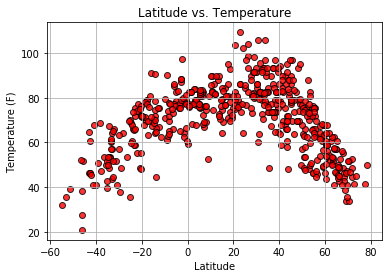

In [31]:
plt.scatter(lat_list,temp_list,color="red",edgecolor="black",linewidths=1,marker="o",alpha=0.8,
            label="Cities")
            
plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("fig1.png")

plt.show()

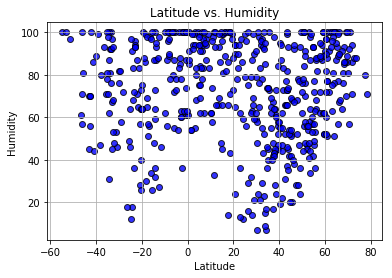

In [32]:
plt.scatter(lat_list,hum_list,color="blue",edgecolor="black",linewidths=1,marker="o",alpha=0.8,
            label="Cities")
            
plt.title("Latitude vs. Humidity" )
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("fig2.png")


plt.show()

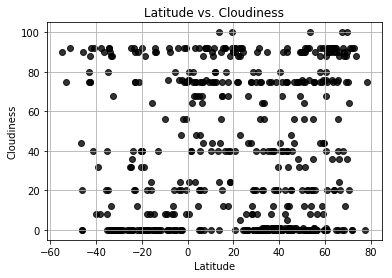

In [36]:
plt.scatter(lat_list,cloud_list,color="black",edgecolor="black",linewidths=1,marker="o",alpha=0.8,
            label="Cities")
            
plt.title("Latitude vs. Cloudiness" )
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("fig3.png")


plt.show()

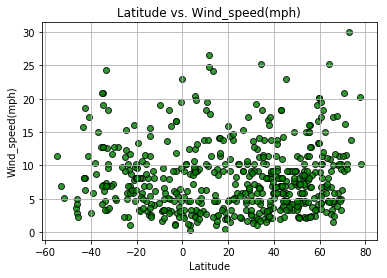

In [35]:
plt.scatter(lat_list,wind_list,color="green",edgecolor="black",linewidths=1,marker="o",alpha=0.8,
            label="Cities")
            
plt.title("Latitude vs. Wind_speed(mph)" )
plt.ylabel("Wind_speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("fig4.png")


plt.show()